In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
plt.style.use(["science","grid"])
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm
def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

In [12]:
data1 = pd.read_feather("./sampling_base/sampling_base_15") # base case 15
data2 = pd.read_feather("./capacity/capacity30")# capacity 30
data3 = pd.read_feather("./rerouting30/rerouting30") # rerouting 30
                        
input1 = pd.read_csv("./sampling_base/input_parameters_15.csv")
input2 = pd.read_csv("./capacity/input_parameters_capacity30.csv")
input3 = pd.read_csv("./rerouting30/input_parameters_rerouting30.csv")

data2.o0 = data2.o0+(np.max(data1.o0)+1)
data3.o0 = data3.o0+(np.max(data2.o0)+1)

data = pd.concat([data1,data2,data3]).reset_index()
input_vars = pd.concat([input1,input2,input3]).reset_index()

In [13]:
# fig, ax = plt.subplots(2,2,figsize=(15,10))

uc_endvals_dict = {}
uc_endvals_dict["unsatisfied consumption"] = list()
uc_endvals_dict["policy type"] = list()
uc_endvals_dict["variation"] = list()
# 1: base 2: 15 3: cap 4: rerouting

for j in input_vars.index:
    uc_endvals_dict["unsatisfied consumption"].append(data.o2[data.o0==j].iloc[-1])
    if input_vars.ration_size_policy[j] == 15:
        uc_endvals_dict["policy type"].append(1)
        uc_endvals_dict["variation"].append(0)
    elif input_vars.capacity_policy[j] > 0:
        uc_endvals_dict["policy type"].append(2)
        uc_endvals_dict["variation"].append(input_vars.capacity_policy[j]-1)
    elif input_vars.rerouting_policy[j] > 0:
        uc_endvals_dict["policy type"].append(3)
        uc_endvals_dict["variation"].append(input_vars.rerouting_policy[j]-1)
    else:
        uc_endvals_dict["policy type"].append(0)
        uc_endvals_dict["variation"].append(0)    
    
    
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars,uc_endvals_df],axis=1)

<ipython-input-35-e29528ba846e>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(np.linspace(0,200,9),fontsize=14)


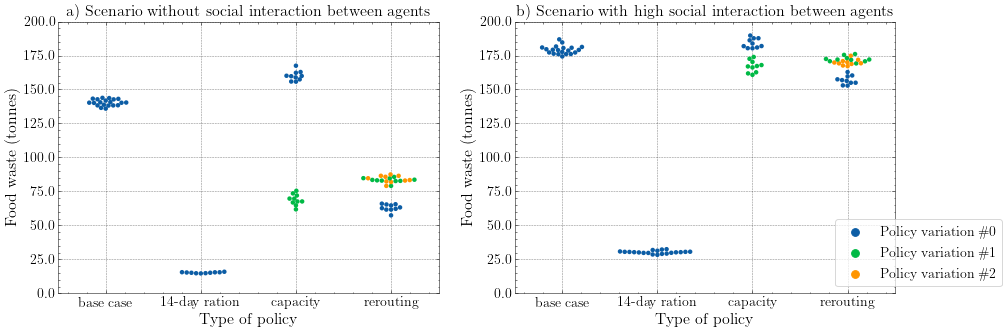

In [35]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

tmp1 = input_vars_filtered[input_vars_filtered.beta == 0.0]
tmp1 = tmp1[tmp1.gamma==3.0]
tmp1 = tmp1[tmp1.epsilon==1.0]
tmp1 = tmp1[tmp1.alpha==1.0]
tmp1 = tmp1[tmp1.parallel_served_full==7.8]

tmp2 = input_vars_filtered[input_vars_filtered.beta == 1.0]
tmp2 = tmp2[tmp2.gamma==3.0]
tmp2 = tmp2[tmp2.epsilon==1.0]
tmp2 = tmp2[tmp2.parallel_served_full==7.8]

sns.swarmplot(ax=ax[0] ,x="policy type", y="unsatisfied consumption",hue='variation', data=tmp1,size=4.5)#palette=my_palette['dark'])

sns.swarmplot(ax=ax[1] ,x="policy type", y="unsatisfied consumption",hue='variation', data=tmp2,size=4.5)#palette=my_palette['dark'])

for a in ax:
    
    a.set_xlabel(r"Type of policy",fontsize=16)
    a.set_xticklabels(["base case","14-day ration","capacity","rerouting"],fontsize=14)
    a.set_ylim([0,200e3])
    a.set_yticklabels(np.linspace(0,200,9),fontsize=14)
    a.set_ylabel("Food waste (tonnes)",fontsize=16)
    
    a.yaxis.grid(True) # Hide the horizontal gridlines
    a.xaxis.grid(True) # Show the vertical gridlines
    
    handles = a.get_legend_handles_labels()[0]

    labels = [0.1,0.5,1.0]
    for j in range(len(labels)):
        labels[j]="Policy variation \#%s"%j
   
    a.get_legend().remove()    
ax[1].legend(handles[:3],labels,loc='lower right',bbox_to_anchor=(1.3, 0),fontsize=14,framealpha=0.75)



ax[0].set_title("a) Scenario without social interaction between agents",fontsize=16)
ax[1].set_title("b) Scenario with high social interaction between agents",fontsize=16);

# plt.savefig("/home/daan/Desktop/foodwaste.png")